## Title Name:

By: Sabine Elsaadany, Natalie Katanchik, Brianna Lin, Simon Littlewood


The following report aims to explore whether played hours and gender can accurately predict subscription. The data observed is from a research group in Computer Science at UBC, exploring how people play video games. Players' navigation of the world is recorded. The team created 2 CSVs - players.csv, observing unique players and data about them, and sessions.csv, observing individual sessions and information about the session. Purpose of study: to target recruitment efforts. This report regards data from players.csv. Specifically, we wish to answer the question: Can played hours predict subscription in players.csv?


**Players.csv (196 rows)** 
- 7 (explored) columns: 
  - 2 decimal:
    - Age (of user) 
    - played_hours (indicating users' hours played). 
  - 3 character:
    - experience (specifies user gaming experience - pro, veteran, amateur, regular, beginner)
    - name
    - gender (male, female, prefer not to say, non-binary, other, two-spirited, agender).
    - hashedEmail (email of user - hashed) -b one per player
  - 1 logical:  
    - Subscribe (indicates whether user is subscribed to game newsletter - TRUE/FALSE). 


**Justification:**
- played hours has relationship with subscription (further observed below).
- Gender seen to have a relationship with subscription (further observed below). 

In [1]:
library(tidyverse)
library(dplyr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players <- read_csv(url)
head(players)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


**Wrangled Data** - NA's removed(as they skew data) and subscribe variable turned into a factor as that is the response variable in our classification question. Also renamed Age to age and hashedEmail to hashed_email for clarity (matching trend).

In [3]:
players <- players |>
    select(experience, subscribe, hashedEmail, played_hours, name, gender, age) |>
    drop_na() |>
    mutate(subscribe = as.factor(subscribe)) |>
    rename(hashed_email=hashedEmail)

head(players)

experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## **Relevant Summary Statistics**

## Context

**Subscribe:** We need to oversample rare class (FALSE) in prediction due to inbalances in our response variable

In [4]:
subscribe_count <- players|>
count(subscribe)

subscribe_count

subscribe,n
<fct>,<int>
FALSE,52
TRUE,144


**Gender:** Mostly males, followed by females. Unequal distribution

In [5]:
gender_count <- players |>
  count(gender)

gender_count

gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


**Played Hours:** 85/196 played 0 hours - raises concern. 

In [6]:
played_hours_count <- players|>
count(played_hours)

head(played_hours_count)

played_hours,n
<dbl>,<int>
0.0,85
0.1,34
0.2,10
0.3,5
0.4,5
0.5,4


## Justification

Proportion data computed to understand the counts better, accounts for category imbalances - relevant for graphs.

In [7]:
ratio_gender_subscribed <- players |>
  group_by(gender) |>
  summarize(
    total = n(),
    subscribed = sum(subscribe == TRUE),
    percentage_subscribed = (subscribed / total)*100)


ratio_gender_subscribed

gender,total,subscribed,percentage_subscribed
<chr>,<int>,<int>,<dbl>
Agender,2,2,100.00000
Female,37,29,78.37838
Male,124,93,75.00000
Non-binary,15,11,73.33333
Other,1,1,100.00000
Prefer not to say,11,4,36.36364
Two-Spirited,6,4,66.66667


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


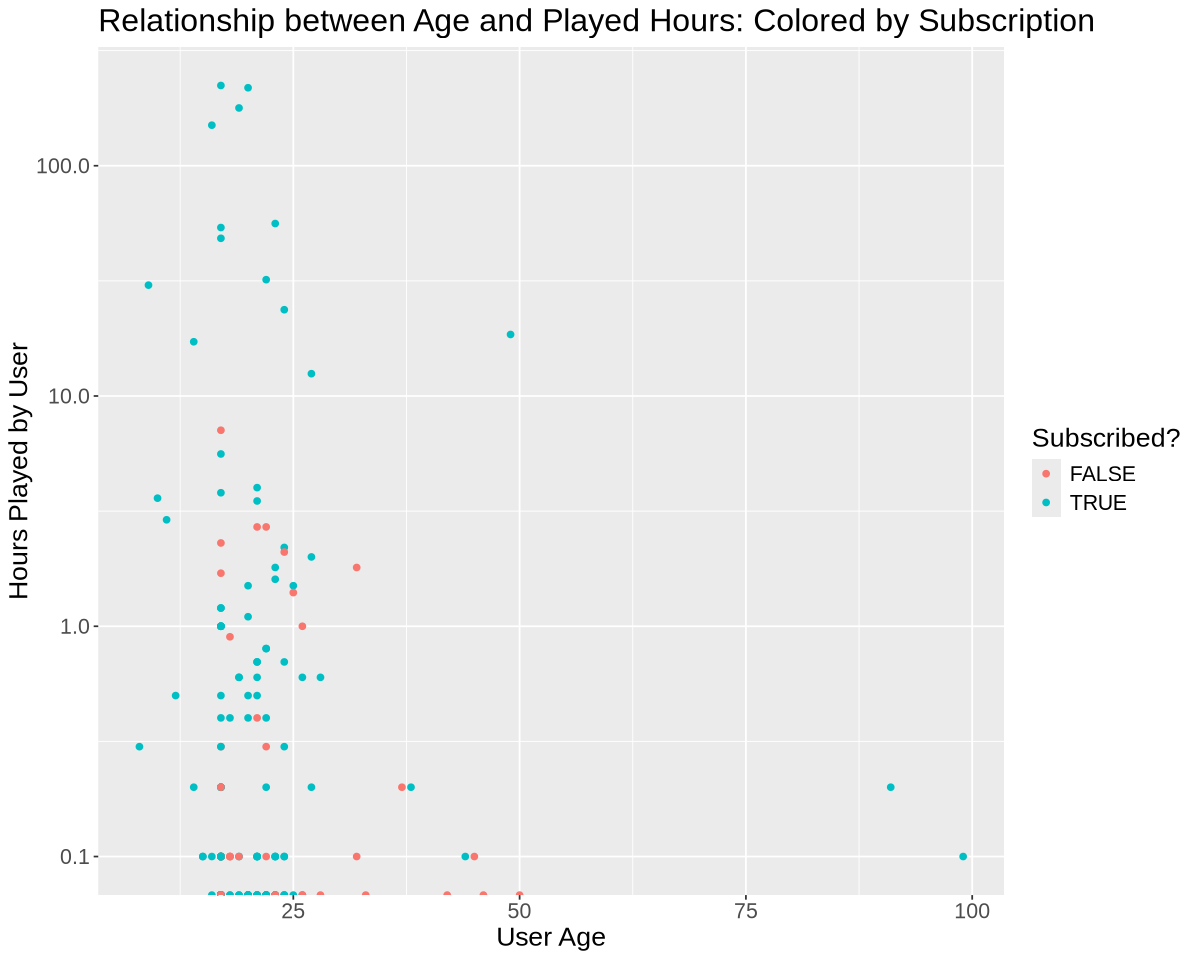

In [11]:
options(repr.plot.width = 10, repr.plot.height = 8)
age_vs_played_hours <- players|>ggplot(aes(x=age, y=played_hours, color=subscribe))+
geom_point() +
scale_y_log10() +
labs(x="User Age", y="Hours Played by User", color="Subscribed?")+
ggtitle("Relationship between Age and Played Hours: Colored by Subscription") +
theme(text = element_text(size = 16))

age_vs_played_hours

Age vs played_hours, color by subscribed. 
- Age does not have a relationship with subscription
- More data points for younger players (>25).
-  Higher played hours correlate with subscription (all >10 = subscribed).
- Played hours likely predictive of subscription.
- Limitation of played hours is the unequal distribution of data (85/196 are at 0 played hours), but since it is the only quantitative variable with a relationship to subscription in the players dataset, it will be used as a predictor. 

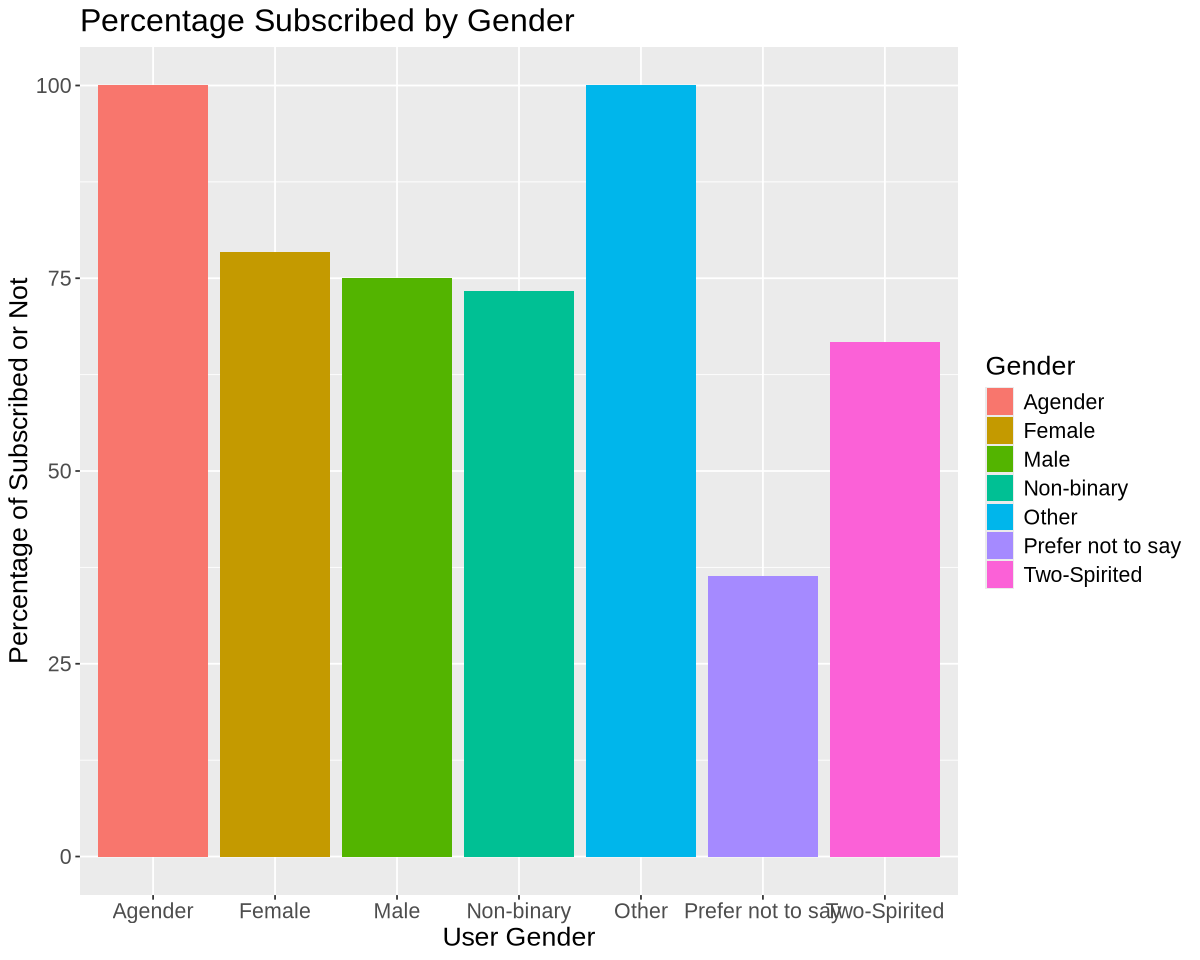

In [12]:
gender_subscribed_ratio_bar <- ratio_gender_subscribed|>ggplot(aes(x=gender, y=percentage_subscribed, fill=gender))+
geom_bar(stat="identity") +
labs(x="User Gender", y="Percentage of Subscribed or Not", fill="Gender")+
ggtitle("Percentage Subscribed by Gender") +
theme(text = element_text(size = 16))


gender_subscribed_ratio_bar

Percentage subscribed by gender - women have a highest subscription rate.
- Small-category sizes limit inference.
- Data limitations prevalent ( limited data for agender and other).
- Change in the dominating gender observed when looking at proportion instead of count.
- Likely a predictive variable.

As seen above, played_hours and gender is indicative of subscription - Looking at percentages subscribed by genders proves that it is not just predictive of subscription due to limited data points. 

In [14]:
players_encoded <- players |>
        mutate(gender_male = ifelse(gender == "Male", 1, 0),
               gender_female = ifelse(gender == "Female", 1, 0),
               gender_nb = ifelse(gender == "Non-binary", 1, 0),
               gender_na = ifelse(gender == "Prefer not to say", 1, 0),
               gender_ts = ifelse(gender == "Two-Spirited", 1, 0),
               gender_agender = ifelse(gender == "Agender", 1, 0))

In [15]:
players_split<- initial_split(players_encoded, prop=0.7, strata=subscribe)
players_training <- training(players_split)
players_testing <- testing(players_split)

In [16]:
players_recipe <- recipe(subscribe~gender + played_hours, data=players_training) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

In [17]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

In [ ]:

players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)